In [1]:
from dataset_management import parse_traces
x, y = parse_traces('VoD-SingleApp-PeriodicLoad', 'DispFrames', ['X_cluster.csv', 'X_flow.csv', 'X_port.csv'], nrows=None)



In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.3
RANDOM_STATE = 42
RANDOM_FOREST_TREES = 120
trace_load = 'VoD-SingleApp-PeriodicLoad'
trace_apps = 'SingleApp'
def nmae(y_pred, y_test):
    return abs(y_pred - y_test).mean() / y_test.mean()
import warnings

warnings.filterwarnings('ignore')


for feature in ['5_eth1_rxkB.s',
'2_kbmemfree',
'3_cpu21_.idle',
'3_cpu21_.idle',
'3_cpu14_.usr',
'3_cpu11_.usr',
'3_cpu18_.usr',
'3_all_..usr',
'3_cpu16_.idle',
]:
    y_metric = 'DispFrames'
    x_worst_feature = pd.DataFrame(x[feature])
    for period in [1,2,4,8,16,32,64,128,256]:
        x_filtered = x_worst_feature[x_worst_feature.index % period == 0]
        y_filtered = y[y.index % period == 0]

        x_train, x_test, y_train, y_test = train_test_split(
            x_filtered, y_filtered, test_size=TEST_SIZE, random_state=RANDOM_STATE)

        regression_tree_regressor = DecisionTreeRegressor()
        regression_tree_regressor.fit(x_train, y_train)

        random_forest_regressor = RandomForestRegressor(
            n_estimators=RANDOM_FOREST_TREES, random_state=RANDOM_STATE, n_jobs=-1)
        random_forest_regressor.fit(x_train, y_train)

        print(
            f'{period},{feature},RT,{nmae(regression_tree_regressor.predict(x_test), y_test[y_metric])},\n')
        print(
            f'{period},{feature},RF,{nmae(random_forest_regressor.predict(x_test), y_test[y_metric])},\n')

                


1,5_eth1_rxkB.s,RT,0.126919869485309,

1,5_eth1_rxkB.s,RF,0.12436227393622891,

2,5_eth1_rxkB.s,RT,0.13068181818181818,

2,5_eth1_rxkB.s,RF,0.1273055379728187,

4,5_eth1_rxkB.s,RT,0.12951112554815655,

4,5_eth1_rxkB.s,RF,0.12768531301319183,

8,5_eth1_rxkB.s,RT,0.1271137307952459,

8,5_eth1_rxkB.s,RF,0.12461899227540833,

16,5_eth1_rxkB.s,RT,0.13903847401544153,

16,5_eth1_rxkB.s,RF,0.1298270940115487,

32,5_eth1_rxkB.s,RT,0.13365185950413225,

32,5_eth1_rxkB.s,RF,0.13153193870523416,

64,5_eth1_rxkB.s,RT,0.11940693672226636,

64,5_eth1_rxkB.s,RF,0.11620774865413468,

128,5_eth1_rxkB.s,RT,0.10924796747967479,

128,5_eth1_rxkB.s,RF,0.11164464769647695,

256,5_eth1_rxkB.s,RT,0.07983623336745138,

256,5_eth1_rxkB.s,RF,0.08544865233708633,

1,2_kbmemfree,RT,0.12363676109820178,

1,2_kbmemfree,RF,0.11928319908656682,

2,2_kbmemfree,RT,0.12097268853305784,

2,2_kbmemfree,RF,0.11757729054060287,

4,2_kbmemfree,RT,0.12181257105733312,

4,2_kbmemfree,RF,0.12017855918286323,

8,2_kbmemfree,RT,0.

In [6]:
from sklearn.feature_selection import f_regression, SelectKBest
import numpy as np

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


TEST_SIZE = 0.3
RANDOM_STATE = 42
RANDOM_FOREST_TREES = 120
trace_load = 'VoD-SingleApp-PeriodicLoad'
trace_apps = 'SingleApp'
def nmae(y_pred, y_test):
    return abs(y_pred - y_test).mean() / y_test.mean()
import warnings

warnings.filterwarnings('ignore')

y_metric = 'DispFrames'
print('Período & Característica & NMAE RT & NMAE RF')
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    
    y_filtered = y[y.index % period == 0]

    selector = SelectKBest(score_func=f_regression, k=100)
    
    selector.fit(x_filtered, y_filtered)
    
    feature_scores = selector.pvalues_

    feature_names = x_filtered.columns
    feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
    
    feature_scores_df.sort_values(by='Score', ascending=True, inplace=True)
    
    best_feature_names = feature_scores_df['Feature'].head(1).tolist()
    univariate_scores = feature_scores_df['Score'].head(1).tolist()
    
    feature = best_feature_names[0]

    x_best_feature = pd.DataFrame(x_filtered[feature])
    x_train, x_test, y_train, y_test = train_test_split(
        x_best_feature, y_filtered, test_size=TEST_SIZE, random_state=RANDOM_STATE)

    regression_tree_regressor = DecisionTreeRegressor()
    regression_tree_regressor.fit(x_train, y_train)

    random_forest_regressor = RandomForestRegressor(
        n_estimators=RANDOM_FOREST_TREES, random_state=RANDOM_STATE, n_jobs=-1)
    random_forest_regressor.fit(x_train, y_train)

    print(f'{period} & {feature} & {nmae(regression_tree_regressor.predict(x_test), y_test[y_metric])} & {nmae(random_forest_regressor.predict(x_test), y_test[y_metric])}')
            


Período & Característica & NMAE RT & NMAE RF
1 & 3_cpu21_.idle & 0.10469777597831532 & 0.10466684577012073
2 & 4_cpu13_.idle & 0.10102319811475292 & 0.10100874137952948
4 & 4_ldavg.5 & 0.11021943664586185 & 0.10845815974665042
8 & 3_ldavg.1 & 0.11115620403474302 & 0.10829765368323843
16 & 3_ldavg.1 & 0.09989402885010489 & 0.09959117410850525
32 & 4_ldavg.1 & 0.1090521694214876 & 0.10385987256903449
64 & 4_pgfree.s & 0.11278792692613186 & 0.1074618303768423
128 & 4_pgfree.s & 0.08485772357723576 & 0.07834942411924119
256 & 3_i128_intr.s & 0.09160696008188332 & 0.07167135789832822


In [2]:
xmenorque15 = x[y['DispFrames'] < 15]
ymenorque15 = y[y['DispFrames'] < 15]

xmaiorque20 = x[y['DispFrames'] > 20]
ymaiorque20 = y[y['DispFrames'] > 20]

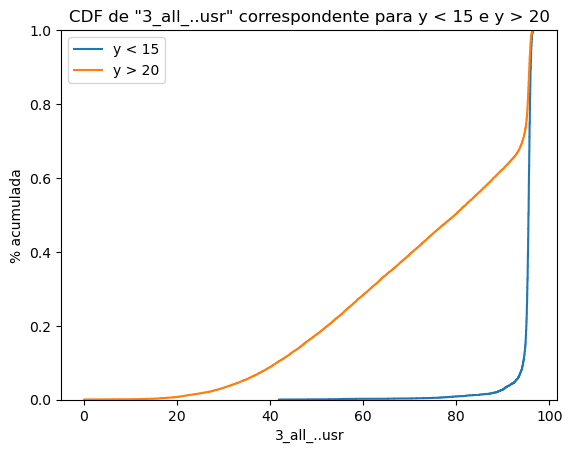

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('CDF de "3_all_..usr" correspondente para y < 15 e y > 20')
plt.ylabel('% acumulada')
plt.xlabel('3_all_..usr')

sns.ecdfplot(xmenorque15['3_all_..usr'], label='y < 15')
sns.ecdfplot(xmaiorque20['3_all_..usr'], label='y > 20')
plt.legend()
plt.show()
    

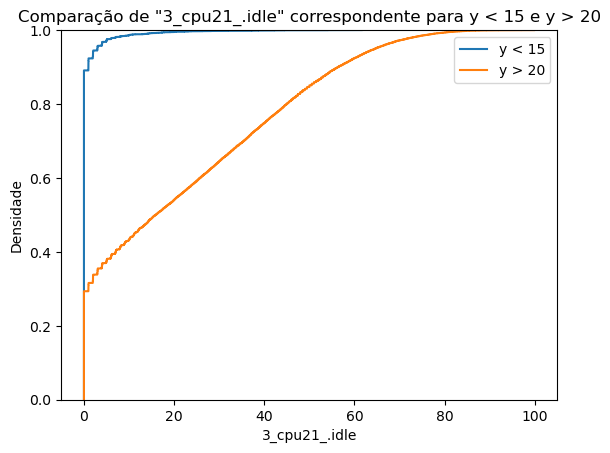

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('CDF de "3_cpu21_.idle" correspondente para y < 15 e y > 20')
plt.ylabel('Densidade')
plt.xlabel('3_cpu21_.idle')

sns.ecdfplot(xmenorque15['3_cpu21_.idle'], label='y < 15')
sns.ecdfplot(xmaiorque20['3_cpu21_.idle'], label='y > 20')
plt.legend()
plt.show()
    

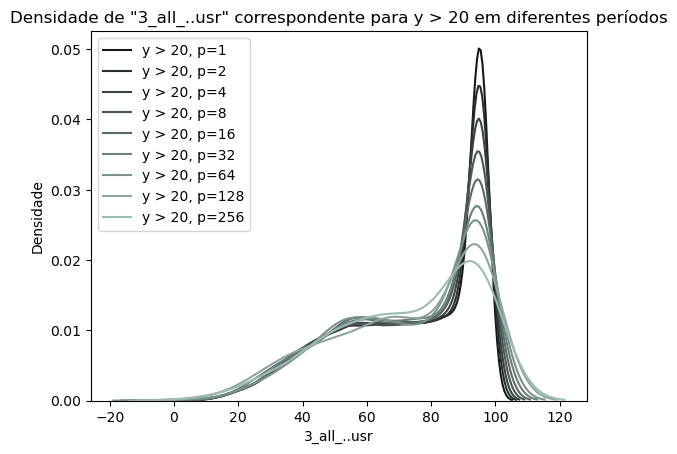

In [102]:
plt.title('Densidade de "3_all_..usr" correspondente para y > 20 em diferentes períodos')
plt.ylabel('Densidade')
plt.xlabel('3_all_..usr')
#plt.yscale('log')

col = .08
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    
    y_filtered = y[y.index % period == 0]

    xmenorque15 = x_filtered[y_filtered['DispFrames'] < 15]
    ymenorque15 = y_filtered[y_filtered['DispFrames'] < 15]
    
    xmaiorque20 = x_filtered[y_filtered['DispFrames'] > 20]
    ymaiorque20 = y_filtered[y_filtered['DispFrames'] > 20]

    #sns.ecdfplot(xmaiorque20['3_all_..usr'], label=f'y > 20, p={period}', color=(col*1.1, col*1.3, col*1.25))
    sns.kdeplot(xmaiorque20['3_all_..usr'], label=f'y > 20, p={period}', color=(col*1.1, col*1.3, col*1.25))
    col += 0.06
plt.legend()
plt.show()

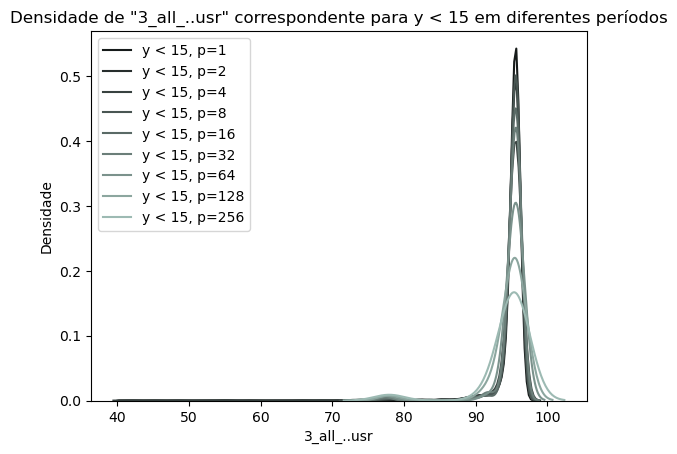

In [106]:
plt.title('Densidade de "3_all_..usr" correspondente para y < 15 em diferentes períodos')
plt.ylabel('Densidade')
plt.xlabel('3_all_..usr')
#plt.yscale('log')

col = .08
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    
    y_filtered = y[y.index % period == 0]

    xmenorque15 = x_filtered[y_filtered['DispFrames'] < 15]
    ymenorque15 = y_filtered[y_filtered['DispFrames'] < 15]
    
    xmaiorque20 = x_filtered[y_filtered['DispFrames'] > 20]
    ymaiorque20 = y_filtered[y_filtered['DispFrames'] > 20]

    #sns.ecdfplot(xmenorque15['3_all_..usr'], label=f'y < 15, p={period}', color=(col*1.1, col*1.3, col*1.25))
    sns.kdeplot(xmenorque15['3_all_..usr'], label=f'y < 15, p={period}', color=(col*1.1, col*1.3, col*1.25))
    col += 0.06
plt.legend()
plt.show()

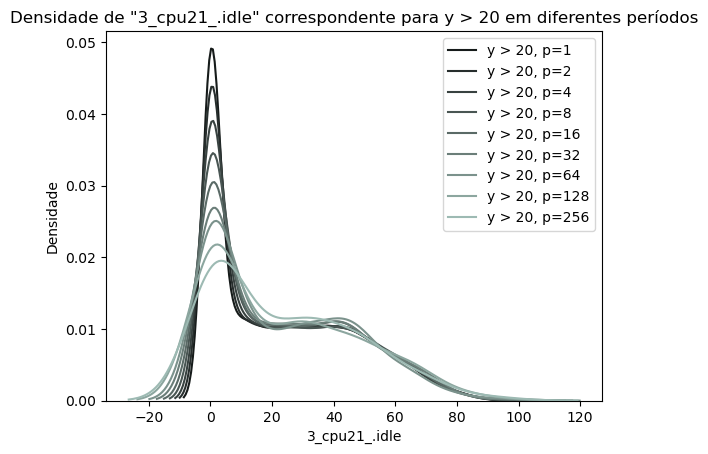

In [112]:
plt.title('Densidade de "3_cpu21_.idle" correspondente para y > 20 em diferentes períodos')
plt.ylabel('Densidade')
plt.xlabel('3_cpu21_.idle')
#plt.yscale('log')

col = .08
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    
    y_filtered = y[y.index % period == 0]

    xmenorque15 = x_filtered[y_filtered['DispFrames'] < 15]
    ymenorque15 = y_filtered[y_filtered['DispFrames'] < 15]
    
    xmaiorque20 = x_filtered[y_filtered['DispFrames'] > 20]
    ymaiorque20 = y_filtered[y_filtered['DispFrames'] > 20]

    #sns.ecdfplot(xmenorque15['3_cpu21_.idle'], label=f'y < 15, p={period}', color=(col*1.1, col*1.3, col*1.25))
    sns.kdeplot(xmaiorque20['3_cpu21_.idle'], label=f'y > 20, p={period}', color=(col*1.1, col*1.3, col*1.25))
    col += 0.06
plt.legend()
plt.show()

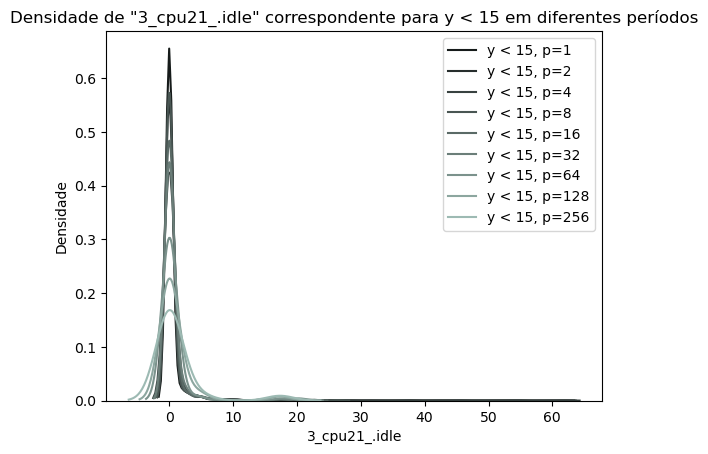

In [113]:
plt.title('Densidade de "3_cpu21_.idle" correspondente para y < 15 em diferentes períodos')
plt.ylabel('Densidade')
plt.xlabel('3_cpu21_.idle')
#plt.yscale('log')

col = .08
for period in [1,2,4,8,16,32,64,128,256]:
    x_filtered = x[x.index % period == 0]
    
    y_filtered = y[y.index % period == 0]

    xmenorque15 = x_filtered[y_filtered['DispFrames'] < 15]
    ymenorque15 = y_filtered[y_filtered['DispFrames'] < 15]
    
    xmaiorque20 = x_filtered[y_filtered['DispFrames'] > 20]
    ymaiorque20 = y_filtered[y_filtered['DispFrames'] > 20]

    #sns.ecdfplot(xmenorque15['3_cpu21_.idle'], label=f'y < 15, p={period}', color=(col*1.1, col*1.3, col*1.25))
    sns.kdeplot(xmenorque15['3_cpu21_.idle'], label=f'y < 15, p={period}', color=(col*1.1, col*1.3, col*1.25))
    col += 0.06
plt.legend()
plt.show()

In [9]:
import pandas as pd

nmaedf = pd.read_csv("/home/dv/data/projects/ic-experiments/nmae_naive-periodic_best-worst_features/2024-03-21T15:19:46/total_X.csv")
nmaedf.dropna(how='all', axis='columns', inplace=True)

In [25]:
nmaedf.columns

Index(['carga', 'apps', 'y', 'método', 'período', 'tipo x',
       'período que ocorreu', 'x', 'nmae'],
      dtype='object')

<Axes: title={'center': 'NMAE para melhor característica de X em diferentes períodos'}, xlabel='Período', ylabel='NMAE'>

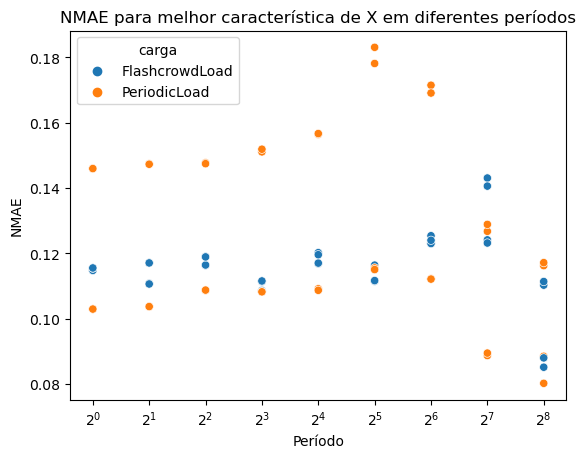

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('NMAE para melhor característica de X em diferentes períodos')
plt.ylabel('NMAE')
plt.xlabel('Período')
plt.xscale('log', base=2)


sns.scatterplot(x="período", y="nmae", hue="carga", data=nmaedf[(nmaedf["período que ocorreu"] == 1) & (nmaedf["tipo x"] == "best") & (nmaedf["y"] == "DispFrames")])

<Axes: title={'center': 'NMAE para 100ª melhor característica de X em diferentes períodos'}, xlabel='período', ylabel='NMAE'>

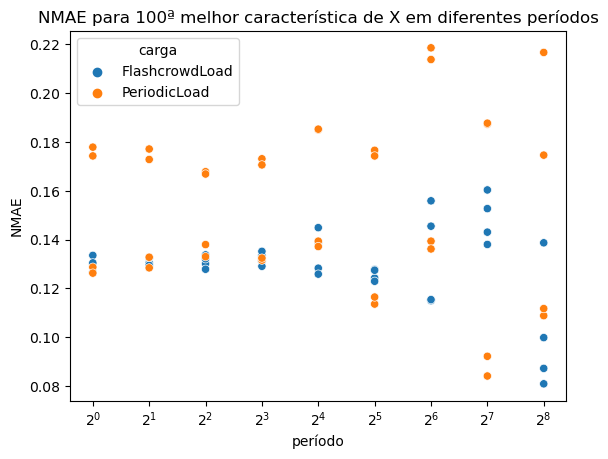

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('NMAE para 100ª melhor característica de X em diferentes períodos')
plt.ylabel('NMAE')
plt.xlabel('período')
plt.xscale('log', base=2)

sns.scatterplot(x="período", y="nmae", hue="carga", data=nmaedf[(nmaedf["período que ocorreu"] == 1) & (nmaedf["tipo x"] == "worst_100") & (nmaedf["y"] == "DispFrames")])

In [55]:
import pandas as pd

nmaedfdividido = pd.read_csv("/home/dv/data/projects/ic-experiments/nmae_naive-periodic_best-worst_features_menor-maior/2024-03-21T20:38:58/total_X.csv")
nmaedfdividido.dropna(how='all', axis='columns', inplace=True)

[]

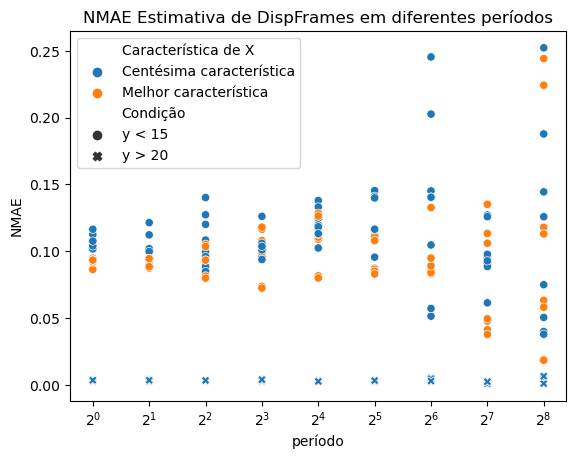

In [75]:
nmaedfdividido

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.title('NMAE Estimativa de DispFrames em diferentes períodos')
plt.ylabel('NMAE')
plt.xlabel('período')
plt.xscale('log', base=2)

sns.scatterplot(x="período", y="nmae", hue="tipo x", style="condição", data=nmaedfdividido[(nmaedf["período que ocorreu"] == 1) & (nmaedf["y"] == "DispFrames")])

leg = plt.legend()
leg.get_texts()[0].set_text('Característica de X')
leg.get_texts()[1].set_text('Centésima característica')
leg.get_texts()[2].set_text('Melhor característica')
leg.get_texts()[3].set_text('Condição')
plt.plot()